In [1]:
import sys
sys.path.append("../")

from models import DiffusivityData
from help_functions import *
from pathlib import Path
from optimize import Optimizer
from plots import *
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

## Prepare the data in DiffusionData object.

In [2]:
Path().joinpath("./examples/AgCu_diffusion_coefficient_data.xlsx").absolute().__str__()
# Path().joinpath("/examples/AgCu_diffusion_coefficient_data.xlsx").absolute()

'C:\\Users\\ustcw\\Desktop\\Research\\DCModeling\\examples\\examples\\AgCu_diffusion_coefficient_data.xlsx'

In [3]:
# Define a DiffusionData object.
elements = ["Ag", "Cu"]
phase = "FCC_A1"
diffusion_data = DiffusivityData(elements)
# load data
datafile = "./AgCu_diffusion_coefficient_data.xlsx"
diffusion_data.load_data_from_excel(datafile)

# thermodynamic interaction parameter datafile
thermo_inter_param_file = "./AgCu_thermodynamic_interaction_parameters.json"
diffusion_data.load_interaction_parameters(thermo_inter_param_file)
#
# # calculate end member diffusion coefficient data.
end_member_file = "./end_member_database.json"
diffusion_data.end_member_calc(end_member_file)


In [4]:
diffusion_data.data.head()

,Literature,Dtype,Element,A_mp,T_C,Dexp,TF,Weight,comp_A_mf,comp_B_mf,temp_celsius,temp_kelvin
0,Sato et al.,DT,A,99.164678,850.0,1.079941e-13,NaN,1,0.991647,0.008353,850.0,1123.0
1,Sato et al.,DT,A,97.446300,850.0,1.453115e-13,NaN,1,0.974463,0.025537,850.0,1123.0
2,Sato et al.,DT,A,96.634840,850.0,1.630797e-13,NaN,1,0.966348,0.033652,850.0,1123.0
3,Sato et al.,DT,A,99.140811,820.0,6.165950e-14,NaN,1,0.991408,0.008592,820.0,1093.0
4,Sato et al.,DT,A,97.446300,820.0,8.433348e-14,NaN,1,0.974463,0.025537,820.0,1093.0


In [5]:
""" using Thermo-Calc owned databases. """
# tc_database="TCAL7"
# diffusion_data.thermodynamic_factor_calc(database_mode="calphad", database=tc_database)

""" read self defined database """
diffusion_data.thermodynamic_factor_calc()

diffusion_data.data.head()

,Literature,Dtype,Element,A_mp,T_C,Dexp,TF,Weight,comp_A_mf,comp_B_mf,temp_celsius,temp_kelvin
0,Sato et al.,DT,A,99.164678,850.0,1.079941e-13,0.976375,1,0.991647,0.008353,850.0,1123.0
1,Sato et al.,DT,A,97.446300,850.0,1.453115e-13,0.926879,1,0.974463,0.025537,850.0,1123.0
2,Sato et al.,DT,A,96.634840,850.0,1.630797e-13,0.903121,1,0.966348,0.033652,850.0,1123.0
3,Sato et al.,DT,A,99.140811,820.0,6.165950e-14,0.974435,1,0.991408,0.008592,820.0,1093.0
4,Sato et al.,DT,A,97.446300,820.0,8.433348e-14,0.923147,1,0.974463,0.025537,820.0,1093.0


## compare tc-calculated and self-calculated thermodynamic factor

In [6]:
# tf_tc = diffusion_data.data.TF
# diffusion_data.thermodynamic_factor_calc()
# tf_self = diffusion_data.data.TF
# plt.scatter(tf_tc, tf_self, s=100)
# diffusion_data.data.head()

## Optimize the parameters using Optimizer object


In [7]:
optimizer = Optimizer(diffusion_data)


In [8]:
optimizer.diffusivity_data.data

,Literature,Dtype,Element,A_mp,T_C,Dexp,TF,Weight,comp_A_mf,comp_B_mf,temp_celsius,temp_kelvin
0,Sato et al.,DT,A,99.164678,850.0,1.079941e-13,0.976375,1,0.991647,0.008353,850.0,1123.0
1,Sato et al.,DT,A,97.446300,850.0,1.453115e-13,0.926879,1,0.974463,0.025537,850.0,1123.0
2,Sato et al.,DT,A,96.634840,850.0,1.630797e-13,0.903121,1,0.966348,0.033652,850.0,1123.0
3,Sato et al.,DT,A,99.140811,820.0,6.165950e-14,0.974435,1,0.991408,0.008592,820.0,1093.0
4,Sato et al.,DT,A,97.446300,820.0,8.433348e-14,0.923147,1,0.974463,0.025537,820.0,1093.0
...,...,...,...,...,...,...,...,...,...,...,...,...
124,Oikawa et al.,DC,AB,99.893939,701.0,6.025596e-15,0.996148,1,0.998939,0.001061,701.0,974.0
125,Oikawa et al.,DC,AB,99.000000,701.0,5.128614e-15,0.963507,1,0.990000,0.010000,701.0,974.0
126,Oikawa et al.,DC,AB,98.000000,701.0,4.677351e-15,0.926641,1,0.980000,0.020000,701.0,974.0
127,Oikawa et al.,DC,AB,96.000000,701.0,4.265795e-15,0.851923,1,0.960000,0.040000,701.0,974.0


In [9]:
optimizer.init_params

array([0.51948398])

In [10]:
# predict diffusion coefficients
diff_calc = optimizer.diffusivity_data.diffusion_coefs_calc([62922.572308])
diff_calc

0      9.028362e-14
1      1.002918e-13
2      1.052506e-13
3      5.397610e-14
4      6.000108e-14
           ...     
124    6.773010e-15
125    6.831675e-15
126    6.877663e-15
127    6.902749e-15
128    6.832371e-15
Length: 129, dtype: float64

In [11]:
# optimizer.init_params = [0.1, 0.2]
# optimizer.model="2-para"
# optimizer.method = "least_squares"
optimizer.optimize()

# optimizer.method = "minimize"
# optimizer.optimize(method="Nelder-Mead")

In [12]:
optimizer.optimized_results

{'OptimizedResult':  active_mask: array([0.])
         cost: 4.9119431476217725
          fun: array([-0.17828737, -0.36829293, -0.43462404, -0.13220581, -0.33784475,
        -0.38679971, -0.10756801, -0.30991543, -0.32481257, -0.6246832 ,
        -0.50932369, -0.55443366, -0.42591916, -0.60006806, -0.5010569 ,
        -0.10125681, -0.27929884, -0.38891399, -0.4127847 , -0.3120802 ,
        -0.39400914, -0.26207101,  0.11176402,  0.02382802,  0.03210754,
        -0.08162448, -0.10510911,  0.13290138, -0.01212703, -0.05174914,
        -0.15026229, -0.10138511,  0.02066184, -0.0889885 , -0.070965  ,
        -0.16965394, -0.23374637,  0.12762994, -0.01958112, -0.02827925,
        -0.12166029, -0.14626346,  0.16006105,  0.06277395, -0.02849636,
        -0.16256168, -0.12687218,  0.0198987 , -0.11055691, -0.15759653,
        -0.16841192, -0.2171885 , -0.0898376 , -0.18908708, -0.33120486,
        -0.39848142, -0.43872013,  0.01556128, -0.15008305, -0.21341955,
        -0.39918074, -0.398666

In [13]:
df = diffusion_data.data

In [14]:
# df.plot(x = "Dexp", y = "D_1-para", kind="scatter", logx=True, logy=True)

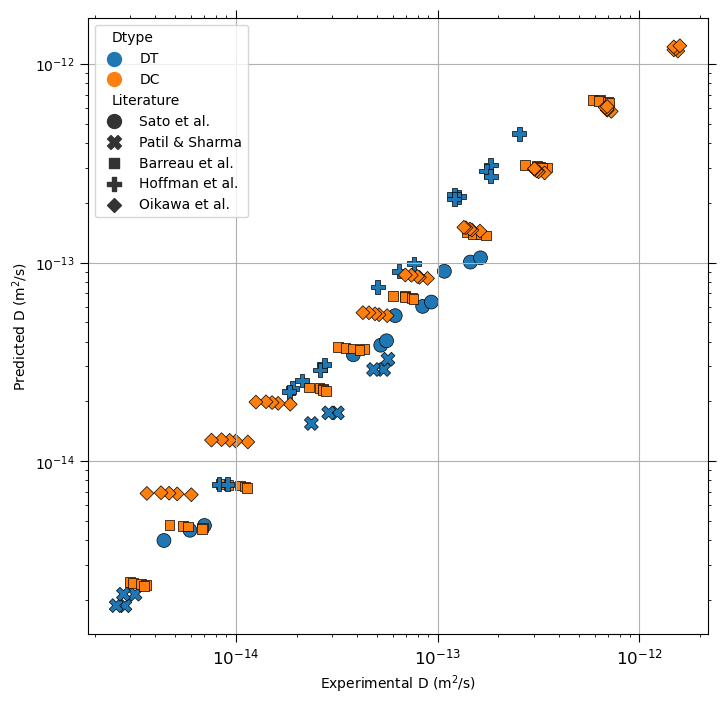

In [15]:
# matplotlib.rcParams['markers.fillstyle'] = "none"
# matplotlib.rcParams['lines.marker'] = None
matplotlib.rcParams['lines.markersize'] = 10
# matplotlib.rcParams['lines.markeredgecolor'] = "black"
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlabel("Experimental D (m$^2$/s)")
ax.set_ylabel("Predicted D (m$^2$/s)")
ax.set_xscale('log')
ax.set_yscale('log', basey=10)
ax.grid(True)
# ax.set_fc("b")
sns.scatterplot(
    data=df, x="Dexp", y="D_1-para", hue="Dtype", style="Literature",
    ax=ax, palette="tab10", edgecolor="black", linewidth=0.5
)

In [16]:
diffusion_data.data

,Literature,Dtype,Element,A_mp,T_C,Dexp,TF,Weight,comp_A_mf,comp_B_mf,temp_celsius,temp_kelvin,D_1-para
0,Sato et al.,DT,A,99.164678,850.0,1.079941e-13,0.976375,1,0.991647,0.008353,850.0,1123.0,9.035887e-14
1,Sato et al.,DT,A,97.446300,850.0,1.453115e-13,0.926879,1,0.974463,0.025537,850.0,1123.0,1.005431e-13
2,Sato et al.,DT,A,96.634840,850.0,1.630797e-13,0.903121,1,0.966348,0.033652,850.0,1123.0,1.055954e-13
3,Sato et al.,DT,A,99.140811,820.0,6.165950e-14,0.974435,1,0.991408,0.008592,820.0,1093.0,5.402363e-14
4,Sato et al.,DT,A,97.446300,820.0,8.433348e-14,0.923147,1,0.974463,0.025537,820.0,1093.0,6.015558e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,Oikawa et al.,DC,AB,99.893939,701.0,6.025596e-15,0.996148,1,0.998939,0.001061,701.0,974.0,6.773842e-15
125,Oikawa et al.,DC,AB,99.000000,701.0,5.128614e-15,0.963507,1,0.990000,0.010000,701.0,974.0,6.839522e-15
126,Oikawa et al.,DC,AB,98.000000,701.0,4.677351e-15,0.926641,1,0.980000,0.020000,701.0,974.0,6.893313e-15
127,Oikawa et al.,DC,AB,96.000000,701.0,4.265795e-15,0.851923,1,0.960000,0.040000,701.0,974.0,6.933555e-15


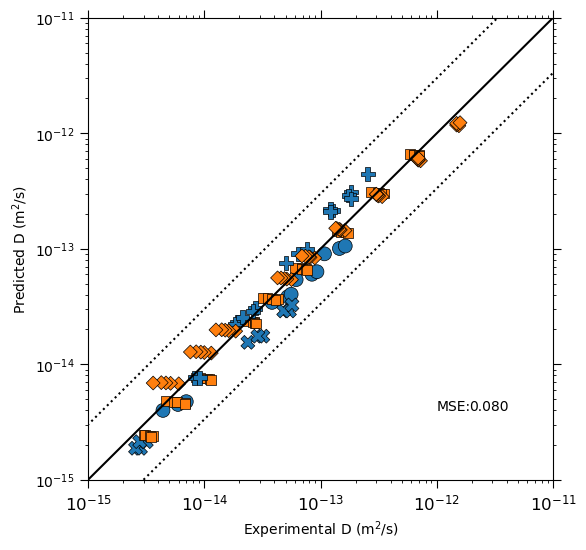

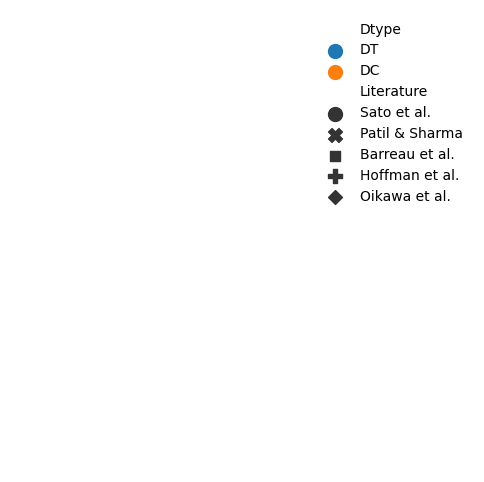

In [17]:
from plots import *
# matplotlib.rcdefaults()
# matplotlib.rcParams['xtick.top'] = True
# matplotlib.rcParams['ytick.right'] = True
# matplotlib.rcParams['xtick.major.size'] = 6
# matplotlib.rcParams['ytick.major.size'] = 6
# matplotlib.rcParams['lines.markersize'] = 10
# matplotlib.rcParams['xtick.minor.size'] = 2
# matplotlib.rcParams['ytick.minor.size'] = 2
# matplotlib.rcParams['xtick.labelsize'] = 12
# matplotlib.rcParams['ytick.labelsize'] = 12
# matplotlib.rcParams['axes.labelsize'] = 12
fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
fig_legend, ax_legend = plt.subplots(figsize=(6,6))
exp_vs_pred_plot(diffusion_data.data, "1-para", ax, ax_legend, hue='Dtype', style='Literature', )

# matplotlib.rcdefaults()

In [18]:
diffusion_data.end_dc.keys()

dict_keys(['AA', 'AB', 'BA', 'BB'])

In [19]:
comps = np.arange(0, 1, 0.01)
temps = diffusion_data.data.temp_celsius.unique()
grid_data = comp_temp_dataframe(comps, temps)
grid_data["TF"] = thermodynamic_factor_user_defined(diffusion_data.thermodynamic_interaction_parameters,
                                  grid_data["comp_A_mf"], grid_data["comp_B_mf"], grid_data["temp_kelvin"])
# grid_data["TF"] = thermodynamic_factor_calphad_engine(grid_data, diffusion_data.elements, "TCAL7")
end_dc = end_member_diffusion_coefs(diffusion_data.elements, end_member_file, grid_data["temp_kelvin"])
all_dc = binary_diffusion_coefs(optimizer.optimized_results["optimized_params"], grid_data["comp_A_mf"],                                                    grid_data["temp_kelvin"], grid_data["TF"], end_dc)

grid_data = pd.concat([grid_data, pd.DataFrame(all_dc)], axis=1)

In [20]:
grid_data

,comp_A_mf,comp_B_mf,temp_celsius,temp_kelvin,TF,DTA,DTB,DIA,DIB,DC
0,0.00,1.00,850.000000,1123.000000,1.000000,5.784307e-14,1.302772e-14,5.784307e-14,1.302772e-14,1.302772e-14
1,0.01,0.99,850.000000,1123.000000,0.922929,6.213886e-14,1.425765e-14,5.734973e-14,1.315879e-14,1.360070e-14
2,0.02,0.98,850.000000,1123.000000,0.848399,6.666243e-14,1.558236e-14,5.655634e-14,1.322006e-14,1.408678e-14
3,0.03,0.97,850.000000,1123.000000,0.776381,7.141755e-14,1.700688e-14,5.544724e-14,1.320382e-14,1.447112e-14
4,0.04,0.96,850.000000,1123.000000,0.706845,7.640726e-14,1.853625e-14,5.400810e-14,1.310225e-14,1.473849e-14
...,...,...,...,...,...,...,...,...,...,...
3095,0.95,0.05,702.210158,975.210158,0.814518,6.933009e-15,8.823198e-15,5.647058e-15,7.186650e-15,5.724038e-15
3096,0.96,0.04,702.210158,975.210158,0.852226,6.496785e-15,8.438844e-15,5.536731e-15,7.191805e-15,5.602934e-15
3097,0.97,0.03,702.210158,975.210158,0.889663,6.078425e-15,8.058529e-15,5.407749e-15,7.169374e-15,5.460598e-15
3098,0.98,0.02,702.210158,975.210158,0.926793,5.678054e-15,7.683241e-15,5.262383e-15,7.120777e-15,5.299551e-15


In [21]:
literature_list = diffusion_data.data["Literature"].unique()[:1]
x_type = "temperature"
literature_list

array(['Sato et al.'], dtype=object)

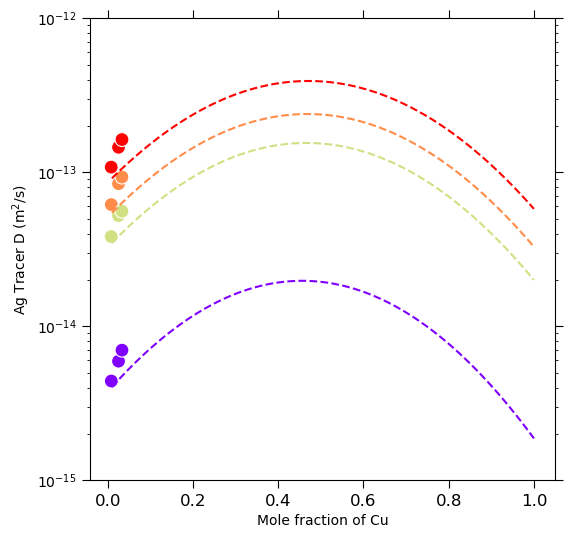

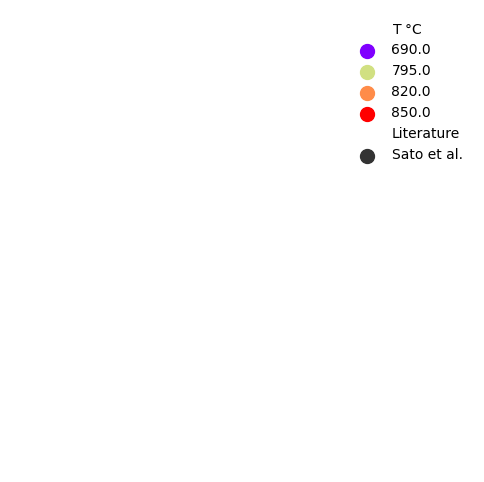

In [22]:
fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
fig_legend, ax_legend = plt.subplots(figsize=(6,6))
conditions_plot(diffusion_data, grid_data, literature_list, x_type, ax, ax_legend, diffusion_type="DT",
                element="A", x_axis_element="B", palette="rainbow")

In [26]:
comps = diffusion_data.data.comp_A_mf.unique()
temps = np.arange(diffusion_data.data.temp_celsius.min(), diffusion_data.data.temp_celsius.max() + 50, 50)
grid_data = comp_temp_dataframe(comps, temps)
grid_data["TF"] = thermodynamic_factor_user_defined(diffusion_data.thermodynamic_interaction_parameters,
                                  grid_data["comp_A_mf"], grid_data["comp_B_mf"], grid_data["temp_kelvin"])
# grid_data["TF"] = thermodynamic_factor_calphad_engine(grid_data, diffusion_data.elements, "TCAL7")
end_dc = end_member_diffusion_coefs(diffusion_data.elements, end_member_file, grid_data["temp_kelvin"])
all_dc = binary_diffusion_coefs(optimizer.optimized_results["optimized_params"], grid_data["comp_A_mf"],                                                    grid_data["temp_kelvin"], grid_data["TF"], end_dc)

grid_data = pd.concat([grid_data, pd.DataFrame(all_dc)], axis=1)

(0.095, 0.115)

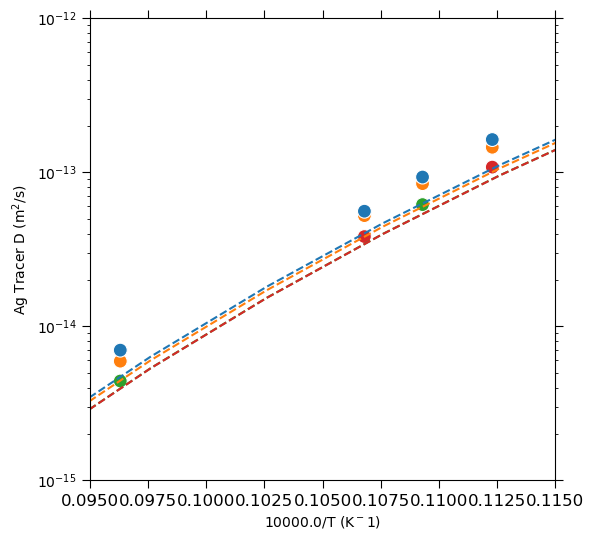

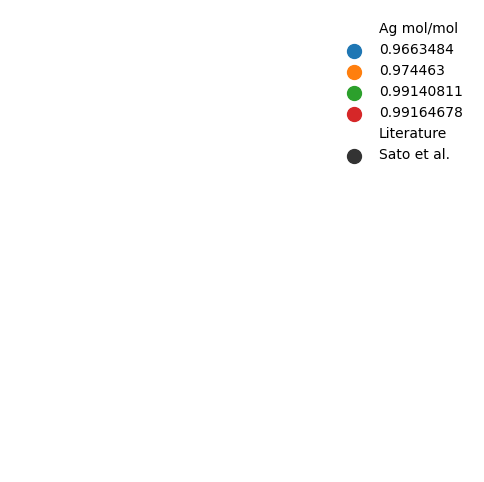

In [29]:
literature_list = diffusion_data.data["Literature"].unique()[:1]
x_type = "composition"
fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
fig_legend, ax_legend = plt.subplots(figsize=(6,6))
conditions_plot(diffusion_data, grid_data, literature_list, x_type, ax, ax_legend, diffusion_type="DT",
                element="A", x_axis_element="B", palette="tab10")
ax.set_xlim(0.095, 0.115)

In [30]:
literature_list

array(['Sato et al.'], dtype=object)